## Visualization of DIC at daily resolution, Aug 1-10, 2017

    SS-run-sets: /home/tjarnik/MEOPAR/SS-run-sets/SalishSea/nemo3.6/one_day_test/SMELT_COG30day
    yaml: SS_OR1.yaml
    
###### How to embed thalweg code into animation? 
###### How to save individual variables with xarray

In [1]:
%reset
import netCDF4 as nc
import matplotlib.pyplot as plt
import datetime
import os
import numpy as np
import cmocean as cm
from salishsea_tools import visualisations as vis
from salishsea_tools import (teos_tools, tidetools)
import xarray as xr 
from matplotlib import animation, rc
from salishsea_tools import (
    nc_tools,
    viz_tools,
    
)

rc('animation', html='html5')

%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
bathy = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
resdir = '/data/tjarniko/results/mar1_30d1/'
PHYS = 'SalishSea_1d_20170801_20170811_grid_T.nc'
SMELT = 'SalishSea_1d_20170801_20170811_ptrc_T.nc'
smelt_res = nc.Dataset(resdir+SMELT)
phys_res = nc.Dataset(resdir+PHYS)

In [4]:
sn = phys_res.variables['vosaline'][:,:,:,:]
DIC = smelt_res.variables['dissolved_inorganic_carbon'][:,:,:,:]

In [5]:
sn1 = sn[0,:,:,:]
DIC1 = DIC[0,:,:,:]

## Salinity, Day 1 - August 1, 2017

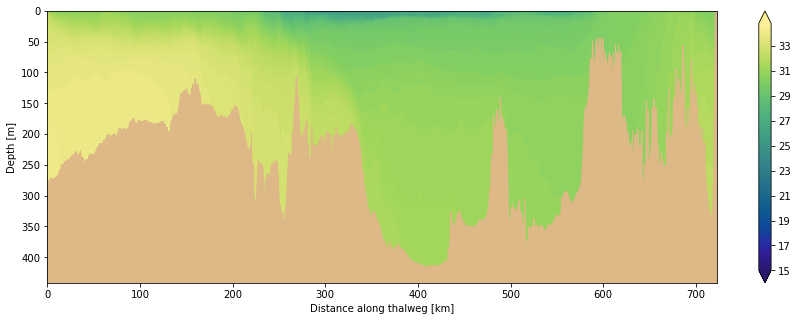

In [6]:
cmap = cm.cm.haline
fig,ax = plt.subplots(1,1,figsize=(15,5))
cbar = vis.contour_thalweg(ax, sn1, bathy, mesh, np.arange(15, 35, 0.2), cmap = cmap)

## DIC, Day 1 - August 1, 2017

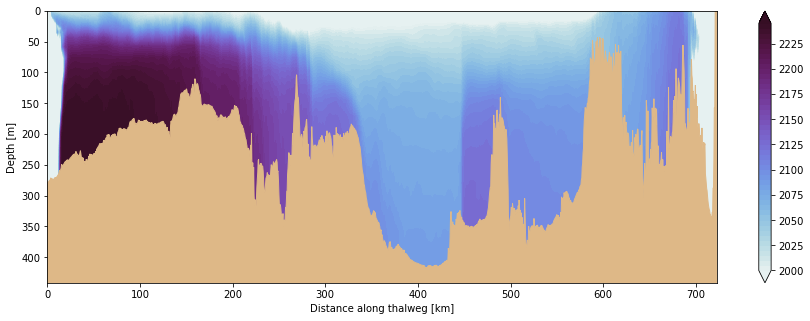

In [7]:
cmap = cm.cm.dense
fig,ax = plt.subplots(1,1,figsize=(15,5))
cbar = vis.contour_thalweg(ax, DIC1, bathy, mesh, np.arange(2000, 2250, 5), cmap = cmap)

In [8]:
#surface animation
def animate_surf(hrly_dat,tit,v_min,v_max,framenum,t_cmap,intvl):
    fig,ax = plt.subplots(figsize=(11,11))
    
    def init():
        tplt = hrly_dat[0,:,:]
        tplt = np.ma.masked_values(tplt, 0)  
        cmap = t_cmap
        s = ax.pcolormesh(tplt, cmap=cmap, vmin = v_min, vmax = v_max)
        cmap.set_bad('slategray')
        ax.set_title(tit + ', hour = 0') 
        fig.colorbar(s, ax=ax)

 
    def make_plot(i):
        ax.clear()
        viz_tools.set_aspect(ax)
        cmap = t_cmap
        tplt = hrly_dat[i,:,:]
        tplt = np.ma.masked_values(tplt, 0)
        mesh = ax.pcolormesh(tplt, cmap=cmap, vmin = v_min, vmax = v_max)
        cmap.set_bad('slategray')
        ax.set_title(tit  + str(i+1)) 
        #ax.colorbar(mesh)
        #fig.colorbar(mesh, ax=ax)
        return ax, mesh
    
    interval = intvl
    ani40 = animation.FuncAnimation(fig,make_plot,frames=framenum,interval=interval*1e+3, init_func = init, repeat=True)

    return ani40

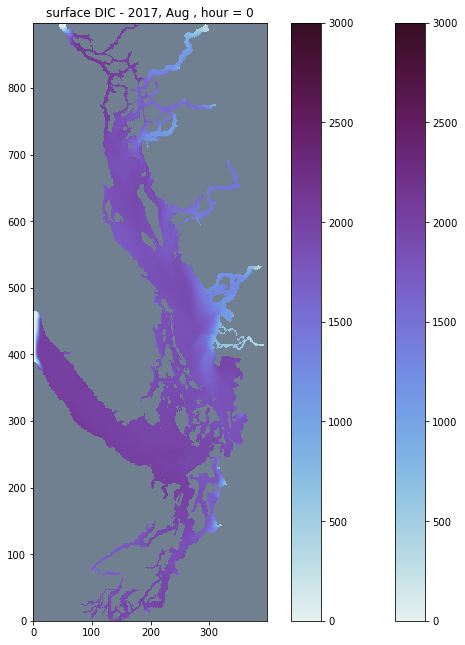

In [9]:
DIC_surf = DIC[:,0,:,:]
animate_surf(DIC_surf, 'surface DIC - 2017, Aug ' ,0,3000,10,cm.cm.dense,.5)